In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
import numpy as np

# VGG16 Feature Extraction
def extract_features_vgg(train_data, test_data):
    base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = Flatten()(base_model_vgg.output)
    model_vgg = Model(inputs=base_model_vgg.input, outputs=x)
    
    train_features_vgg = model_vgg.predict(train_data, batch_size=32)
    test_features_vgg = model_vgg.predict(test_data, batch_size=32)
    
    return train_features_vgg, test_features_vgg


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def squeeze_net(input_shape=(224, 224, 3), num_classes=1000):
    inputs = layers.Input(shape=input_shape)

    # Convolution Layer: 3x3, 64 filters
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = layers.ReLU()(x)

    # Fire Module 1: Squeeze 16 filters, Expand 64 and 64 filters
    x = fire_module(x, 16, 64, 64)

    # Fire Module 2: Squeeze 16 filters, Expand 64 and 64 filters
    x = fire_module(x, 16, 64, 64)

    # Fire Module 3: Squeeze 32 filters, Expand 128 and 128 filters
    x = fire_module(x, 32, 128, 128)

    # Fire Module 4: Squeeze 32 filters, Expand 128 and 128 filters
    x = fire_module(x, 32, 128, 128)

    # Fire Module 5: Squeeze 48 filters, Expand 192 and 192 filters
    x = fire_module(x, 48, 192, 192)

    # Fire Module 6: Squeeze 48 filters, Expand 192 and 192 filters
    x = fire_module(x, 48, 192, 192)

    # Fire Module 7: Squeeze 64 filters, Expand 256 and 256 filters
    x = fire_module(x, 64, 256, 256)

    # Final Convolution Layer: 1x1, 1000 filters (for classification)
    x = layers.Conv2D(num_classes, (1, 1), padding='same')(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Softmax()(x)

    model = models.Model(inputs, outputs)

    return model

def fire_module(x, squeeze_filters, expand_filters_1x1, expand_filters_3x3):
    # Squeeze layer: 1x1 convolutions
    squeeze = layers.Conv2D(squeeze_filters, (1, 1), padding='same')(x)
    squeeze = layers.ReLU()(squeeze)

    # Expand layers: 1x1 and 3x3 convolutions
    expand_1x1 = layers.Conv2D(expand_filters_1x1, (1, 1), padding='same')(squeeze)
    expand_1x1 = layers.ReLU()(expand_1x1)

    expand_3x3 = layers.Conv2D(expand_filters_3x3, (3, 3), padding='same')(squeeze)
    expand_3x3 = layers.ReLU()(expand_3x3)

    # Concatenate expand_1x1 and expand_3x3 along channels axis
    output = layers.concatenate([expand_1x1, expand_3x3], axis=-1)

    return output

# Create the SqueezeNet model
model = squeeze_net(input_shape=(224, 224, 3), num_classes=2)

# Summary of the model architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │      1,040 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │      1,088 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │      9,280 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ re_lu_2[0][0],    │
│ (Concatenate)       │ 128)              │            │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 112, 112,  │      2,064 │ concatenate[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 112, 112,  │      1,088 │ re_lu_4[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 112, 112,  │      9,280 │ re_lu_4[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_5 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_6 (ReLU)      │ (None, 112, 112,  │          0 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 112, 112,  │          0 │ re_lu_5[0][0],  

 Total params: 526,338 (2.01 MB)

 Trainable params: 526,338 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

# SqueezeNet Feature Extraction
def extract_features_squeezenet(train_data, test_data):
    # Build the custom SqueezeNet model
    base_model_squeezenet =squeeze_net(input_shape=(224, 224, 3), num_classes=2)  # No pre-trained weights

    # Remove the top classification layer and use the feature extractor part
    x = Flatten()(base_model_squeezenet.output)
    model_squeezenet = Model(inputs=base_model_squeezenet.input, outputs=x)

    # Extract features from the train and test data
    train_features_squeezenet = model_squeezenet.predict(train_data, batch_size=32)
    test_features_squeezenet = model_squeezenet.predict(test_data, batch_size=32)

    return train_features_squeezenet, test_features_squeezenet


In [5]:
#Data Preparation
train_dir = r"C:\Users\Admin\Downloads\BoneFractureDataset\training"
test_dir = r"C:\Users\Admin\Downloads\BoneFractureDataset\testing"
datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_data = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

train_features_vgg, test_features_vgg = extract_features_vgg(train_data, test_data)
train_features_squeezenet, test_features_squeezenet = extract_features_squeezenet(train_data, test_data)


Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


NameError: name 'extract_features_vgg' is not defined

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest Classifier for VGG16 features
rf_vgg = RandomForestClassifier(n_estimators=100)
rf_vgg.fit(train_features_vgg, train_data.classes)
predictions_vgg = rf_vgg.predict(test_features_vgg)
accuracy_vgg = accuracy_score(test_data.classes, predictions_vgg)
print(f"Random Forest (VGG16) Test Accuracy: {accuracy_vgg * 100:.2f}%")

# Random Forest Classifier for SqueezeNet features
rf_squeezenet = RandomForestClassifier(n_estimators=100)
rf_squeezenet.fit(train_features_squeezenet, train_data.classes)
predictions_squeezenet = rf_squeezenet.predict(test_features_squeezenet)
accuracy_squeezenet = accuracy_score(test_data.classes, predictions_squeezenet)
print(f"Random Forest (SqueezeNet) Test Accuracy: {accuracy_squeezenet * 100:.2f}%")


Random Forest (VGG16) Test Accuracy: 53.00%
Random Forest (SqueezeNet) Test Accuracy: 58.17%


In [6]:
from sklearn.svm import SVC

# SVM for VGG16 features
svm_vgg = SVC(kernel='linear')
svm_vgg.fit(train_features_vgg, train_data.classes)
predictions_svm_vgg = svm_vgg.predict(test_features_vgg)
accuracy_svm_vgg = accuracy_score(test_data.classes, predictions_svm_vgg)
print(f"SVM (VGG16) Test Accuracy: {accuracy_svm_vgg * 100:.2f}%")

# SVM for SqueezeNet features
svm_squeezenet = SVC(kernel='linear')
svm_squeezenet.fit(train_features_squeezenet, train_data.classes)
predictions_svm_squeezenet = svm_squeezenet.predict(test_features_squeezenet)
accuracy_svm_squeezenet = accuracy_score(test_data.classes, predictions_svm_squeezenet)
print(f"SVM (SqueezeNet) Test Accuracy: {accuracy_svm_squeezenet * 100:.2f}%")


SVM (VGG16) Test Accuracy: 52.33%
SVM (SqueezeNet) Test Accuracy: 60.00%


In [7]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression for VGG16 features
lr_vgg = LogisticRegression(max_iter=1000)
lr_vgg.fit(train_features_vgg, train_data.classes)
predictions_lr_vgg = lr_vgg.predict(test_features_vgg)
accuracy_lr_vgg = accuracy_score(test_data.classes, predictions_lr_vgg)
print(f"Logistic Regression (VGG16) Test Accuracy: {accuracy_lr_vgg * 100:.2f}%")

# Logistic Regression for SqueezeNet features
lr_squeezenet = LogisticRegression(max_iter=1000)
lr_squeezenet.fit(train_features_squeezenet, train_data.classes)
predictions_lr_squeezenet = lr_squeezenet.predict(test_features_squeezenet)
accuracy_lr_squeezenet = accuracy_score(test_data.classes, predictions_lr_squeezenet)
print(f"Logistic Regression (SqueezeNet) Test Accuracy: {accuracy_lr_squeezenet * 100:.2f}%")


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (VGG16) Test Accuracy: 53.00%
Logistic Regression (SqueezeNet) Test Accuracy: 60.00%


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [11]:

# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features_vgg, train_data.classes)
predictions_dt_vgg = dt.predict(test_features_vgg)
accuracy_dt_vgg = accuracy_score(test_data.classes, predictions_dt_vgg)
print(f"Decision Tree (VGG16) Test Accuracy: {accuracy_dt_vgg * 100:.2f}%")



Decision Tree (VGG16) Test Accuracy: 50.33%


In [13]:
from sklearn.preprocessing import  StandardScaler
# Standardize Features
scaler = StandardScaler()
train_features_vgg_scaled = scaler.fit_transform(train_features_vgg)
test_features_vgg_scaled = scaler.transform(test_features_vgg)

train_features_squeezenet_scaled = scaler.fit_transform(train_features_squeezenet)
test_features_squeezenet_scaled = scaler.transform(test_features_squeezenet)

In [ ]:
print(f"VGG16 Feature Shape: {train_features_vgg_scaled.shape}")
print(f"SqueezeNet Feature Shape: {train_features_squeezenet_scaled.shape}")


VGG16 Feature Shape: (8863, 25088)
SqueezeNet Feature Shape: (8863, 2)


In [20]:
from sklearn.decomposition import PCA
#Applying PCA only on VGG16 features 
pca_vgg = PCA(n_components=0.95, random_state=42)
train_features_vgg_pca = pca_vgg.fit_transform(train_features_vgg_scaled)
test_features_vgg_pca = pca_vgg.transform(test_features_vgg_scaled)

# For SqueezeNet, use features directly since it has only 2 features
train_features_squeezenet_pca = train_features_squeezenet_scaled
test_features_squeezenet_pca = test_features_squeezenet_scaled


In [21]:
from xgboost import XGBClassifier  
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [22]:
model_names = []
accuracies_vgg = []
accuracies_squeezenet = []
cv_scores_vgg = []
cv_scores_squeezenet = []

#Function to Train, Evaluate and Plot 
def evaluate_model(model, train_features, test_features, train_classes, test_classes):
    model.fit(train_features, train_classes)
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_classes, predictions)
    return accuracy, predictions


In [23]:
print("Evaluating Models on VGG16 Features ")
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    accuracy_vgg, predictions_vgg = evaluate_model(
        model, train_features_vgg_pca, test_features_vgg_pca, train_data.classes, test_data.classes
    )
    model_names.append(model_name)
    accuracies_vgg.append(accuracy_vgg)
    
    # Cross-Validation
    try:
        cv_score = cross_val_score(model, train_features_vgg_pca, train_data.classes, cv=5)
        cv_scores_vgg.append(cv_score)
    except Exception as e:
        print(f"Cross-Validation for {model_name} failed: {e}")


Evaluating Models on VGG16 Features 

Model: Logistic Regression

Model: KNN

Model: SVM

Model: Decision Tree

Model: Random Forest

Model: XGBoost


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

In [24]:
print("\nEvaluating Models on SqueezeNet Features ")
for model_name, model in models.items():
    accuracy_squeezenet, predictions_squeezenet = evaluate_model(
        model, train_features_squeezenet_pca, test_features_squeezenet_pca, train_data.classes, test_data.classes
    )
    accuracies_squeezenet.append(accuracy_squeezenet)
    
    # Cross-Validation
    try:
        cv_score = cross_val_score(model, train_features_squeezenet_pca, train_data.classes, cv=5)
        cv_scores_squeezenet.append(cv_score)
    except Exception as e:
        print(f"Cross-Validation for {model_name} failed: {e}")



Evaluating Models on SqueezeNet Features 


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:24:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:24:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:24:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

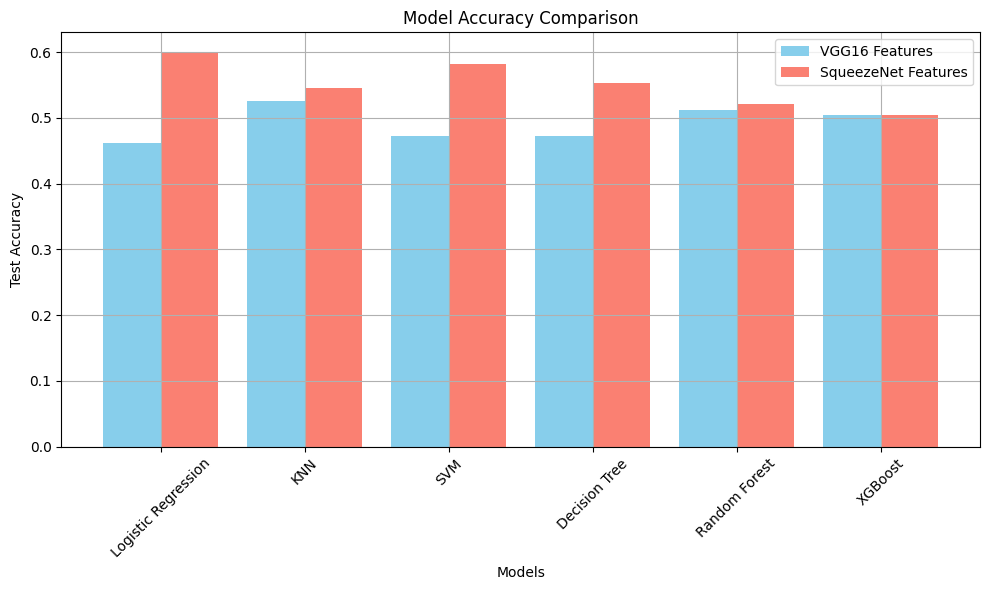

In [25]:
#plot for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x - 0.2, accuracies_vgg, width=0.4, label='VGG16 Features', color='skyblue')
plt.bar(x + 0.2, accuracies_squeezenet, width=0.4, label='SqueezeNet Features', color='salmon')
plt.xticks(x, model_names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_42128\4036582195.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_vgg_data, labels=model_names, patch_artist=True)


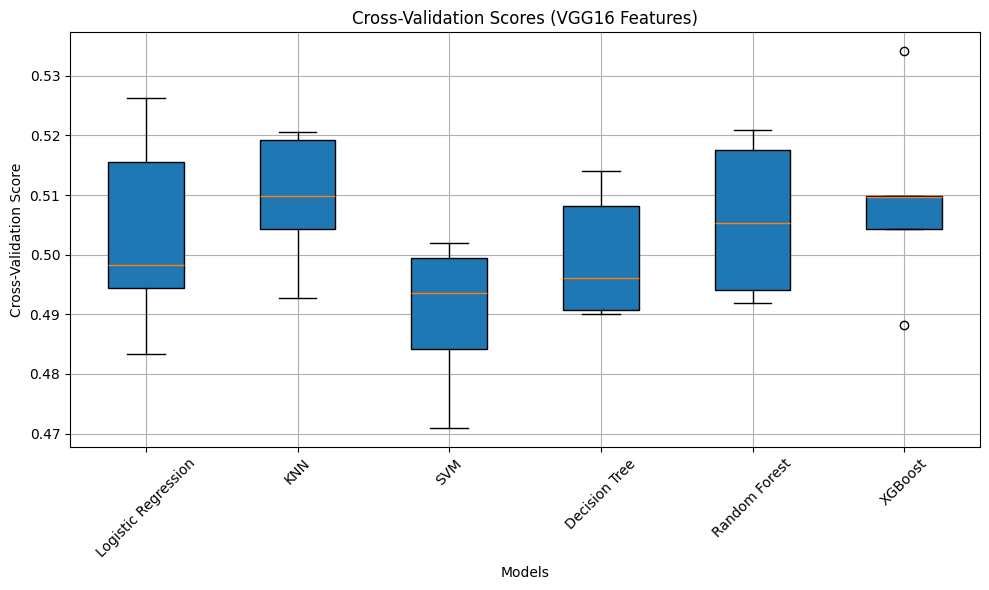

In [26]:
#for cv scores
plt.figure(figsize=(10, 6))
cv_vgg_data = [cv for cv in cv_scores_vgg]
plt.boxplot(cv_vgg_data, labels=model_names, patch_artist=True)
plt.xlabel("Models")
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Scores (VGG16 Features)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

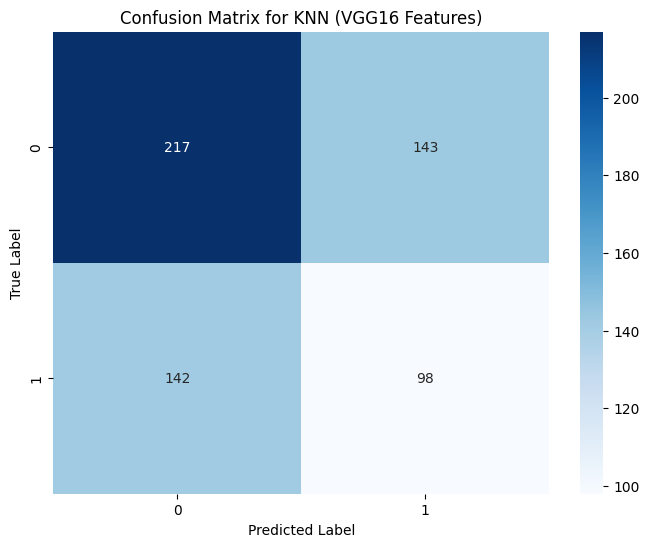

In [27]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
best_model_vgg_index = np.argmax(accuracies_vgg)
best_model_vgg = list(models.values())[best_model_vgg_index]
best_model_vgg.fit(train_features_vgg_pca, train_data.classes)
best_predictions_vgg = best_model_vgg.predict(test_features_vgg_pca)
conf_matrix_vgg = confusion_matrix(test_data.classes, best_predictions_vgg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {model_names[best_model_vgg_index]} (VGG16 Features)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()